In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
import plotly.tools as tls 
import plotly.figure_factory as ff

In [2]:
data = pd.read_csv('Churn_Modelling.csv', delimiter=',')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data = data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [5]:
data.shape

(10000, 11)

In [6]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data.isnull().sum()


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
data.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

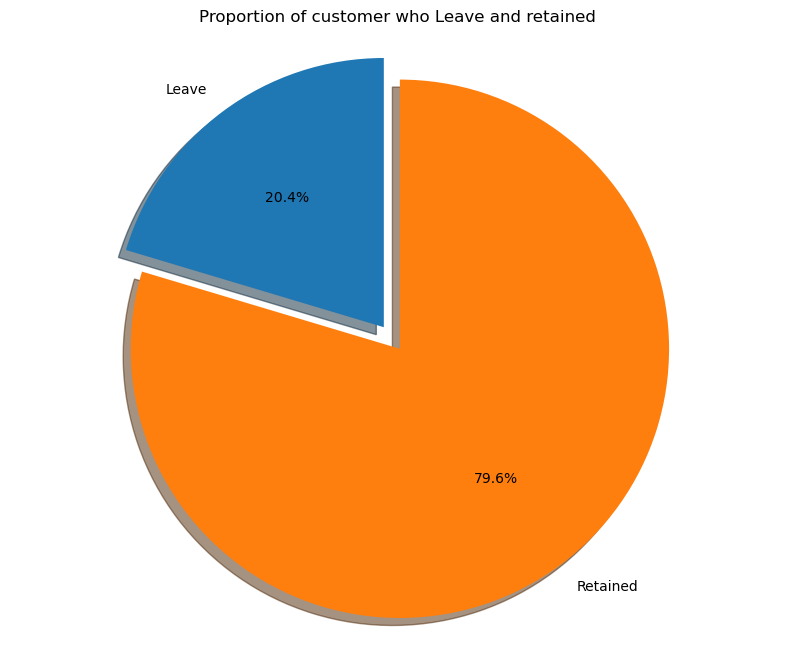

In [11]:
labels = 'Leave', 'Retained'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer who Leave and retained")
plt.show()

In [12]:
target_columns = ["Exited"]
categorical_columns   = data.nunique()[data.nunique() < 6].keys().tolist()
categorical_columns   = [x for x in categorical_columns if x not in target_columns]
continous_columns   = [x for x in data.columns if x not in categorical_columns + target_columns]
churn     = data[data["Exited"] == 1]
not_churn = data[data["Exited"] == 0]

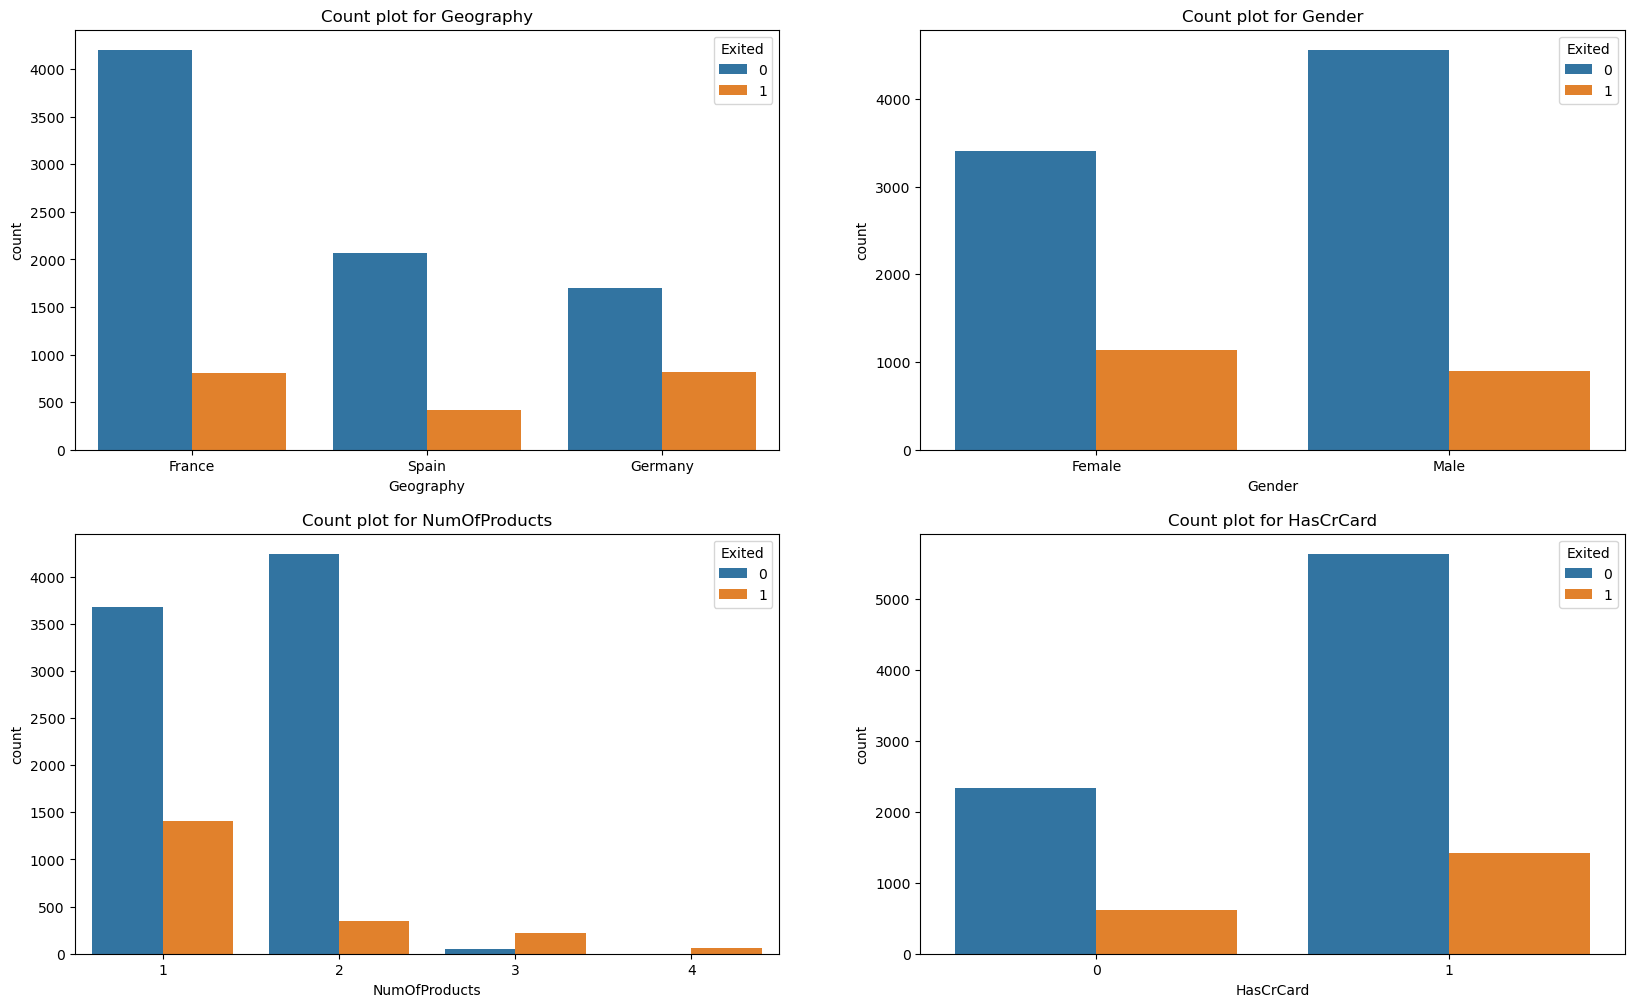

In [20]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
for i in range(2):
    for j in range(2):
        # Get column index for current subplot
        idx = i * 2 + j
        # Create count plot for column
        sns.countplot(x=categorical_columns[idx], hue='Exited', data=data, ax=axarr[i][j])
        axarr[i][j].set_title(f"Count plot for {categorical_columns[idx]}")
# Show plot
plt.show()

In [23]:
def plot_pie(column):   
    churned_customer = go.Pie(values  = churn[column].value_counts().values.tolist(),
                              labels  = churn[column].value_counts().keys().tolist(),
                              hoverinfo = "label+percent+name",
                              domain  = dict(x = [0,.48]),
                              name    = "Churn Customers",
                              marker  = dict(line = dict(width = 2, color = "rgb(243,243,243)") ), 
                              hole= .6)
    not_churned_customer = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                                  labels  = not_churn[column].value_counts().keys().tolist(),
                                  hoverinfo = "label+percent+name",
                                  domain  = dict(x = [.52,1]),
                                  name    = "Non churn customers" ,
                                  marker  = dict(line = dict(width = 2, color = "rgb(243,243,243)") ), hole    = .6,)
    layout = go.Layout(dict(title = column + " Distribution of customer  ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [churned_customer,not_churned_customer]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

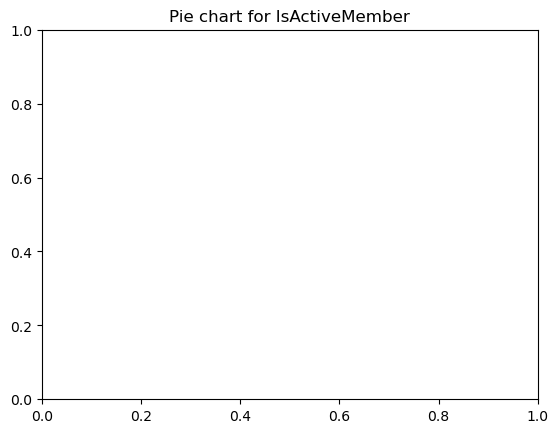

In [29]:
for index, col in enumerate(categorical_columns):
    plot_pie(categorical_columns[index])
    plt.title(f'Pie chart for {col}')

In [33]:
continous_columns

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

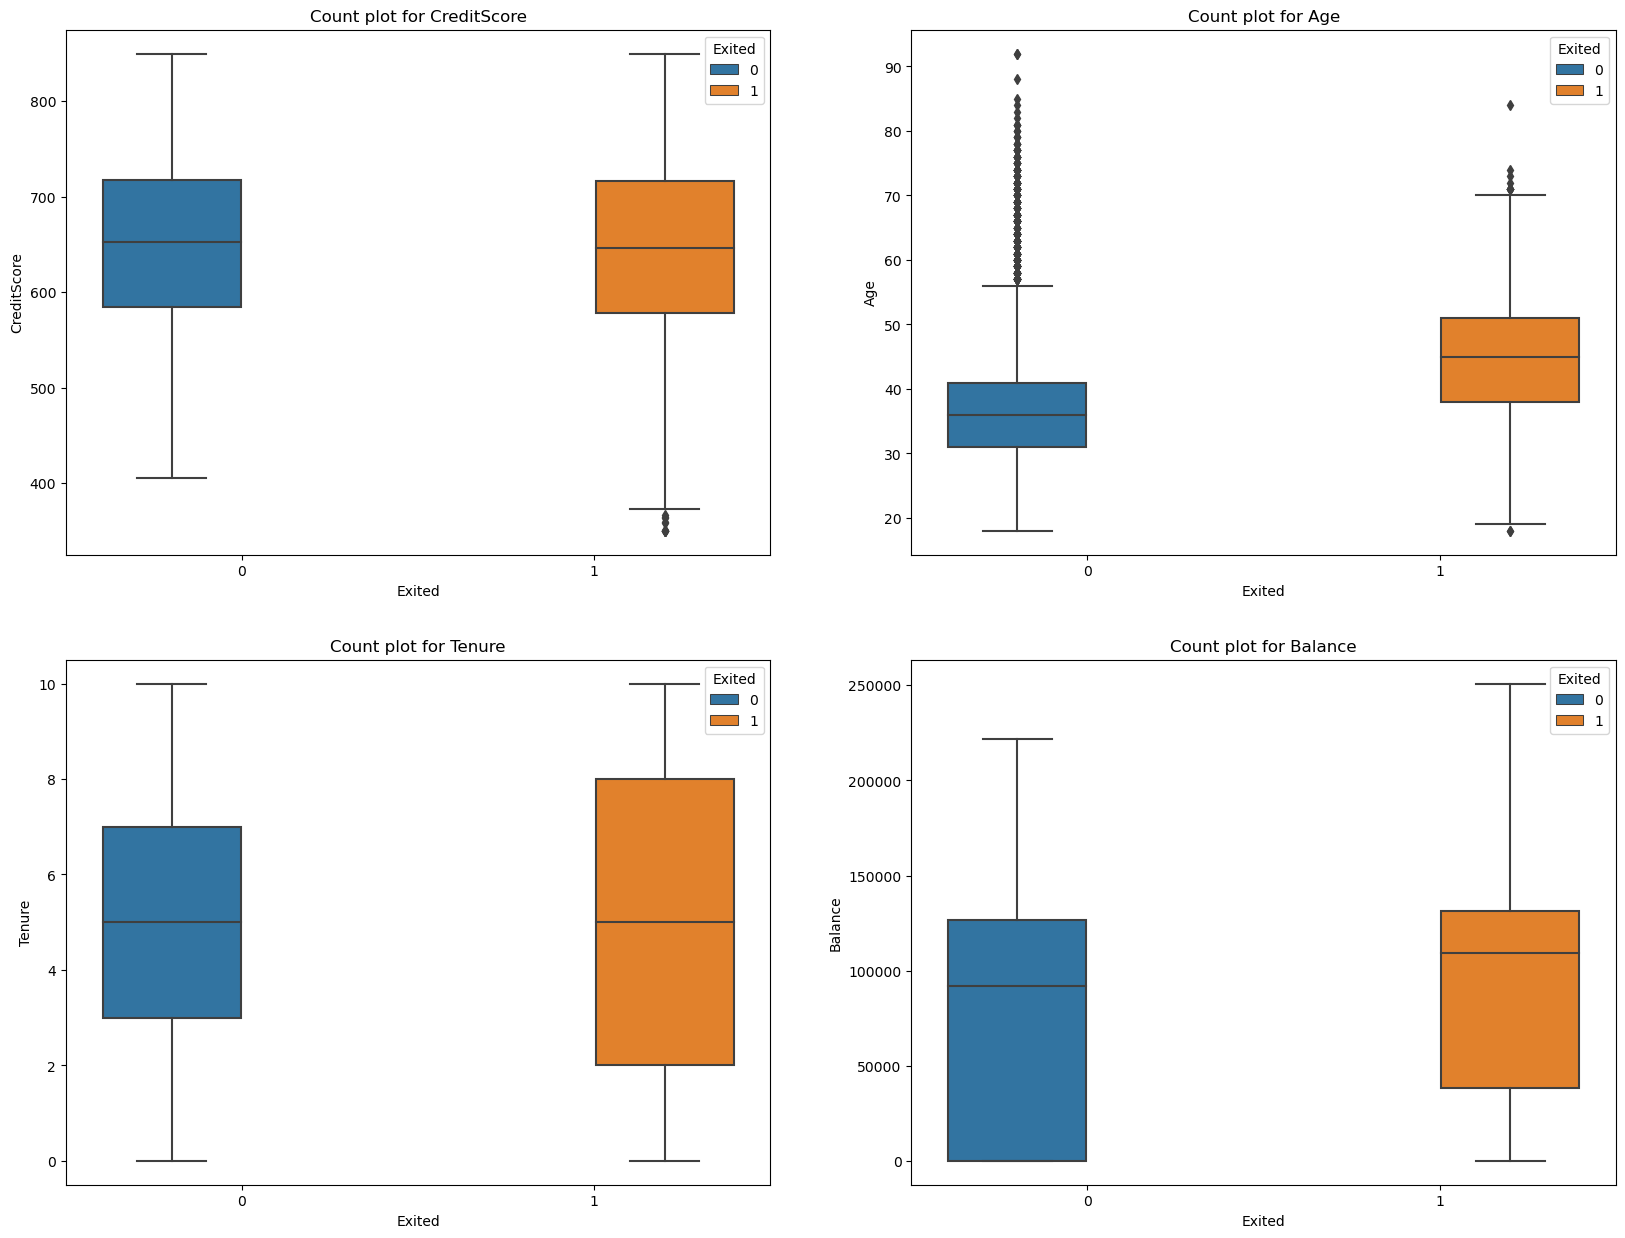

In [35]:
# box plot for continous variables
fig, axarr = plt.subplots(2,2, figsize=(20, 15))
for i in range(2):
    for j in range(2):
        # Get column index for current subplot
        idx = i * 2 + j
        # Create count plot for column
        sns.boxplot(y=continous_columns[idx], x= 'Exited' , hue='Exited', data=data, ax=axarr[i][j])
        axarr[i][j].set_title(f"Count plot for {continous_columns[idx]}")
# Show plot
plt.show()

In [36]:
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

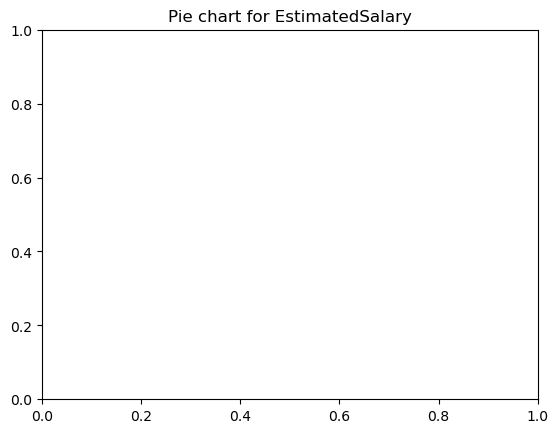

In [37]:
for index, col in enumerate(continous_columns):
    histogram(continous_columns[index])
    plt.title(f'Pie chart for {col}')

C:\Users\Pc\AppData\Local\Temp\ipykernel_18704\3983936326.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



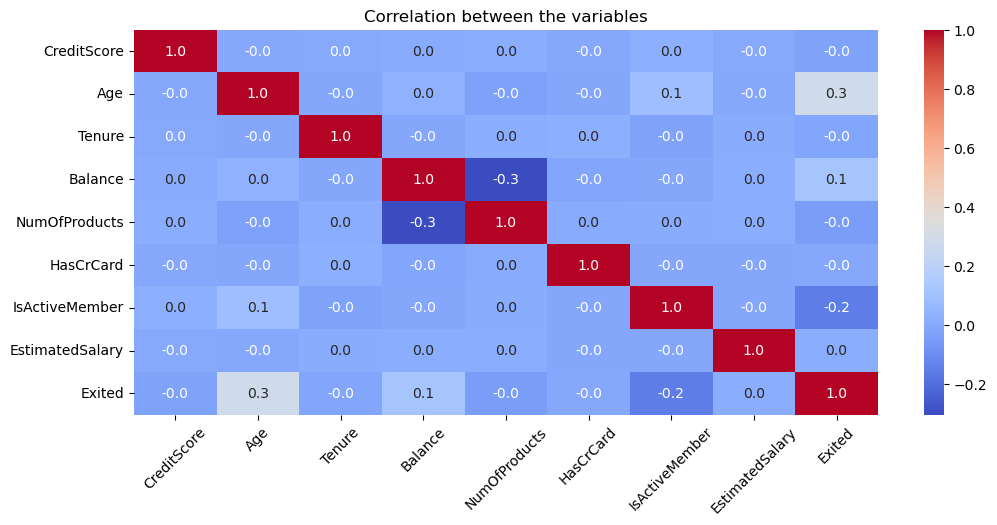

In [38]:
plt.subplots(figsize=(12,5))
correlation=data.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt=".1f")
plt.title('Correlation between the variables')
plt.xticks(rotation=45)
plt.show()
